In [2]:
import torch
from contextual_distros import ContextualLatentSpaceGMM
from matplotlib import pyplot as plt
import numpy as np

In [3]:
device = torch.device("cpu")

0.75


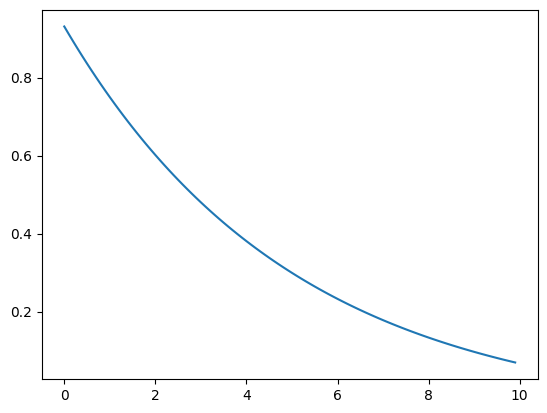

In [4]:
x = np.arange(0, 10, 0.1)

a = 0.2
b = 0.75 - np.exp(-a) # a + 0.75 

y = np.exp(-a * x) + b # -a * x + b

plt.plot(x, y)

print(y[10])

In [6]:
context_size = 5
z_dim = 2
num_samples = 10000

context = torch.rand((num_samples, context_size, z_dim), device=device) * 3
# context = torch.ones((context_size, z_dim), device=device) * 1.5
print(context.shape)

p_z = ContextualLatentSpaceGMM(context)

print(p_z.mu.shape)
print(p_z.sigma.shape)
print([g.mean for g in p_z.gaussians])

torch.Size([10000, 5, 2])
torch.Size([10000, 2])
torch.Size([10000, 2])
[tensor([[1.5719, 1.2182],
        [0.9174, 1.7014],
        [1.5729, 1.9681],
        ...,
        [1.0829, 1.6943],
        [1.2789, 1.5294],
        [0.9549, 1.4530]]), tensor([[ 1.5719, -1.2182],
        [ 0.9174, -1.7014],
        [ 1.5729, -1.9681],
        ...,
        [ 1.0829, -1.6943],
        [ 1.2789, -1.5294],
        [ 0.9549, -1.4530]]), tensor([[-1.5719,  1.2182],
        [-0.9174,  1.7014],
        [-1.5729,  1.9681],
        ...,
        [-1.0829,  1.6943],
        [-1.2789,  1.5294],
        [-0.9549,  1.4530]]), tensor([[-1.5719, -1.2182],
        [-0.9174, -1.7014],
        [-1.5729, -1.9681],
        ...,
        [-1.0829, -1.6943],
        [-1.2789, -1.5294],
        [-0.9549, -1.4530]])]


torch.Size([10000, 2])


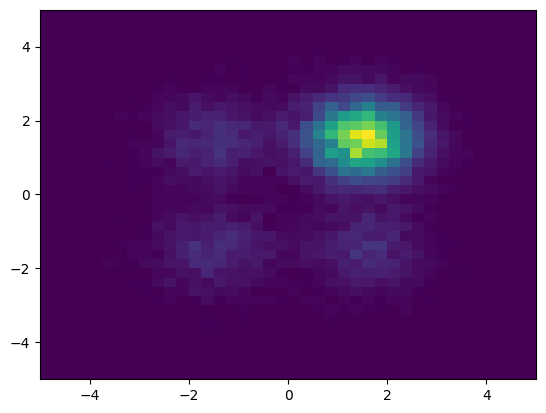

In [9]:
samples = p_z.sample()

print(samples.shape)

plt.hist2d([z[0] for z in samples], [z[1] for z in samples], bins=40, range=[(-5, 5), (-5, 5)])
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()